# Notebook: Data Load and Analysis

In this notebook, we illustrate how to use pandas and Jupyter notebook to **analyze a dataset**. It will cover how to do basic analysis of a dataset using **pandas functions**, **sklearn** and how to transform a dataset by **mapping functions**.

## Contents
The structure of the notebook is as follows:
* Import a Dataset Into Jupyter
* Basic Analysis of Dataset
* Mapping Functions to Transform Data
* Histograms
* Kernel Density Estimation in Practice


## Sources

<!--BOOK_INFORMATION-->
*This notebook has been modified by Aythami Morales from:

[Data Analysis with Python and pandas using Jupyter Notebook](https://dev.socrata.com/blog/2016/02/01/pandas-and-jupyter-notebook.html) by Amy Ghate; [scikitlearn Density Estimation ](http://scikit-learn.org/stable/modules/density.html) by scikit-learn developers (BSD License)


## Installing Python and Jupyter

You can run Jupyter notebook in the cloud using a service like https://try.jupyter.org/ or install and run it locally. To install it locally follow the instructions here: http://jupyter.readthedocs.org/en/latest/install.html. You will need to have or install Python 3.3 or greater or Python 2.7.


### Import a Dataset Into Jupyter

Before we import our sample dataset into the notebook we will import the pandas library. pandas is an open source Python library that provides "high-performance, easy-to-use data structures and data analysis tools." - http://pandas.pydata.org/

In [38]:
import pandas as pd
print(pd.__version__)

2.2.3


Next, we will read the following dataset from Efron et al, 2004 [http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html].

Pandas provides several methods for reading data in differet formats. Here we'll read it in as csv but you can read in json and Excel files as well. 



The data is returned as a "DataFrame" which is a 2 dimensional spreadsheet-like datastructure with columns of different types. pandas has two main data structures - the DataFrame and Series. A Series is a one-dimensional array that can hold any value type - This is not necessarily the case but a DataFrame column may be treated as a Series.

Displayed below are the first 5 rows of the DataFrame we imported (to see the last n rows use .tail(n)).

In [39]:
# import os

# os.getcwd()
#read the csv file (dentro de pandas)
df = pd.read_csv('diabetes.csv', sep=';')

In [40]:
#display the first 5 rows (s son datos sangineos de serum con respecto a diabetes, y la Y tambien)
df.head(5)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,48,1,21.6,87.0,183,103.2,70.0,3.0,38.918,69,75
1,72,2,30.5,93.0,156,93.6,41.0,4.0,46.728,85,141
2,24,1,25.3,84.0,198,131.4,40.0,5.0,48.903,89,206
3,50,1,23.0,101.0,192,125.4,52.0,4.0,42.905,80,135
4,23,1,22.6,89.0,139,64.8,61.0,2.0,41.897,68,97


### Basic Analysis of Dataset

pandas has several methods that allow you to quickly analyze a dataset and get an idea of the type and amount of data you are dealing with along with some important statistics. 

In [41]:
# returns the row and column count of a dataset
df.shape

(441, 11)

In [42]:
# returns statistics about the numerical columns in a dataset 
df.describe()

# tenemos valores minimos y maximos y percentiles entre estos (%25,50,75)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,48.494331,1.467120,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408,41.320320,91.269841,152.136054
std,13.114378,0.499484,4.414694,13.843672,34.613383,30.429116,12.936663,1.291911,14.247448,11.507595,77.180542
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.912000,58.000000,25.000000
25%,38.000000,1.000000,23.200000,84.000000,165.000000,96.200000,41.000000,3.000000,40.775000,83.000000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,44.659000,91.000000,140.000000
75%,59.000000,2.000000,29.200000,105.000000,210.000000,134.600000,58.000000,5.000000,49.345000,98.000000,212.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,61.048000,124.000000,346.000000


You can drop feature columns to remove unwanted values

In [43]:
# in this example we remove BP column
df.drop("BP", axis=1).describe(include="all")

# la función drop nos permite quitar una columna (si los datos no son relevantes o no nos interesa)

,AGE,SEX,BMI,S1,S2,S3,S4,S5,S6,Y
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,48.494331,1.467120,26.362812,189.213152,115.489569,49.815193,4.070408,41.320320,91.269841,152.136054
std,13.114378,0.499484,4.414694,34.613383,30.429116,12.936663,1.291911,14.247448,11.507595,77.180542
min,19.000000,1.000000,18.000000,97.000000,41.600000,22.000000,2.000000,3.912000,58.000000,25.000000
25%,38.000000,1.000000,23.200000,165.000000,96.200000,41.000000,3.000000,40.775000,83.000000,87.000000
50%,50.000000,1.000000,25.700000,186.000000,113.000000,48.000000,4.000000,44.659000,91.000000,140.000000
75%,59.000000,2.000000,29.200000,210.000000,134.600000,58.000000,5.000000,49.345000,98.000000,212.000000
max,79.000000,2.000000,42.200000,301.000000,242.400000,99.000000,9.090000,61.048000,124.000000,346.000000


In [44]:
# returns the data type of each column
df.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

Here are some additional methods that can give you statistics of a DataFrame or particular column in a DataFrame.
- .mean(axis=0 [will give you the calculated value per column]) - returns the statistical mean 
- .median(axis=0 [will give you the calculated value per column]) - returns the statistical median 
- .mode(axis=0 [will give you the calculated value per column]) - returns the statistical mode
- .count() - gives number of total values in column
- .unique() - returns array of all unique values in that column
- .value_counts() - returns object containing counts of unique values

In [45]:
v=df.AGE.mean()
print(v)

48.49433106575964


In [46]:
df.BMI.count()

np.int64(441)

In [47]:
df.SEX.value_counts()

SEX
1    235
2    206
Name: count, dtype: int64

### Mapping Functions to Transform Data

Often times we need to apply a function to a column in a dataset to transform it. pandas makes it easy to do with the .apply() method. In this example, we will map the values in the "SEX" column to either a "MALE" or "FEMALE" depending on the value. We will append this information to the DataFrame in a new column.

Try to define your functions in separete modules. In this example we will import our own module my_module.py located in the folder my_modules.

In [48]:
#add your module folder to the python path
import sys
sys.path.append('./my_modules')

#my_module is an example of python module created to include your own functions
import my_module

In [49]:
# the function mapSEX is located in the file my_module.py. See the file for details
df['sex_mapped_value'] = df['SEX'].apply(my_module.mapSEX)
df['sex_mapped_value'].head(5)

0      MALE
1    FEMALE
2      MALE
3      MALE
4      MALE
Name: sex_mapped_value, dtype: object

In [50]:
# count based on the new labels
df.sex_mapped_value.value_counts()

#df.dtypes
#df

sex_mapped_value
MALE      235
FEMALE    206
Name: count, dtype: int64

### Histograms

A density estimator is an algorithm which seeks to model the probability distribution that generated a dataset. For one dimensional data, you are probably already familiar with one simple density estimator: the histogram. A histogram divides the data into discrete bins, counts the number of points that fall in each bin, and then visualizes the results in an intuitive manner.

The standard count-based histogram can be created with the ``plt.hist()`` function.
By specifying the ``density`` parameter of the histogram, we end up with a normalized histogram where the height of the bins does not reflect counts, but instead reflects probability density:

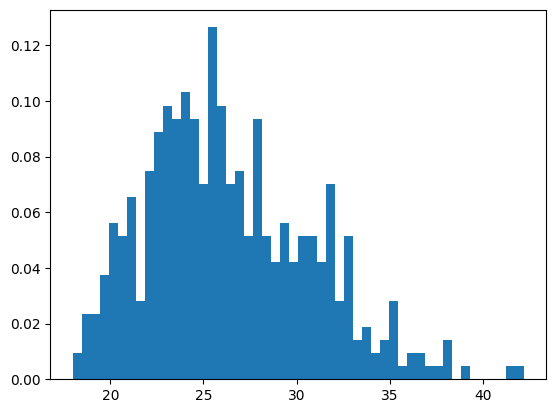

In [51]:
# output of plotting commands is displayed inline within frontends
%matplotlib inline 

# plt is a function with basic plots
import matplotlib.pyplot as plt

# plot the standard count-based histogram
hist = plt.hist(df.BMI, bins=50, density=True)
#hist = plt.hist(df.BMI, bins=50)

# El hueco en el punto 2 más abajo es debido a defectos de representación

Notice that for equal binning, this normalization simply changes the scale on the y-axis, leaving the relative heights essentially the same as in a histogram built from counts. This normalization is chosen so that the total area under the histogram is equal to 1.

One of the issues with using a histogram as a density estimator is that the choice of bin size and location can lead to representations that have qualitatively different features.

<br>
<font color='red'>TASK 1: TEST DIFFERENT BINS VALUES. REPRESENT AND ANALYZE THE RESULTS</font> 


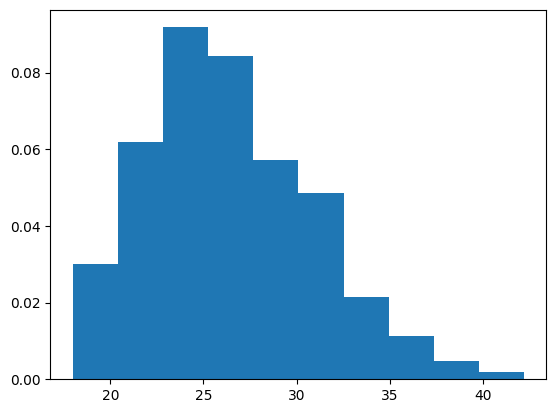

In [52]:
# plot the standard count-based histogram
hist = plt.hist(df.BMI, bins=10, density=True)

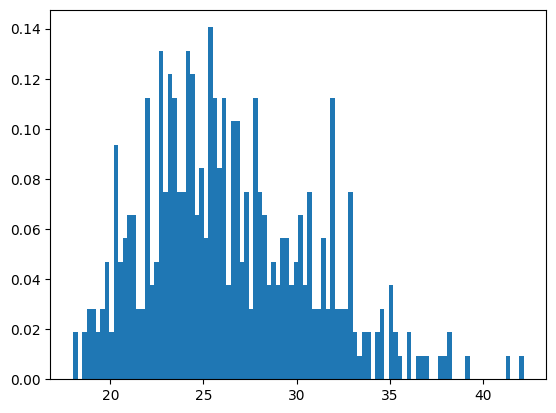

In [53]:
# plot the standard count-based histogram
hist = plt.hist(df.BMI, bins=100, density=True)

<br>
<font color='red'>ADD YOUR ANALYSIS</font> 
<br>
El histograma muestra una mayor cantidad
<br>

### Kernel Density Estimation in Practice

The free parameters of kernel density estimation are the *kernel*, which specifies the shape of the distribution placed at each point, and the *kernel bandwidth*, which controls the size of the kernel at each point.
In practice, there are many kernels you might use for a kernel density estimation: in particular, the Scikit-Learn KDE implementation supports one of six kernels, which you can read about in Scikit-Learn's [Density Estimation documentation](http://scikit-learn.org/stable/modules/density.html).

Let's first show a simple example of replicating the above plot using the Scikit-Learn ``KernelDensity`` estimator. The selection of bandwidth is an important piece of KDE. For the same input data, different bandwidths can produce very different results:

(-0.02, 0.1)

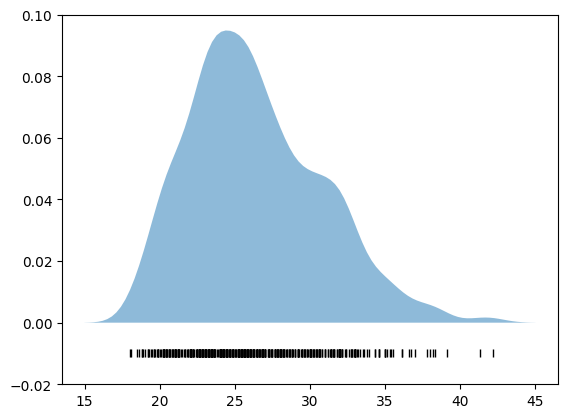

In [54]:
# Esto es parecido a los histogramas pero con una distribución de Kernel
# Este algoritmo pone una distribución normal en cada dato, y lo repite para cada uno de ellos,
# Despues se hace la suma todo esto, y la zona que tiene más datos nos da los picos.
# El resultado es la grafica kernel gausiana más de abajo

# Ir a la documentación de kernel estimation y hacer pruebas y ejercicios

from sklearn.neighbors import KernelDensity
import numpy as np

# in this example we will estimate the kernel density of the BMI feature
x=df.BMI
x1 = np.array(x)  # IMPORTANTE COVERTIR A numpy array
# sampling with 100 points from 15 to 45
x_d = np.linspace(15, 45, 100)

# instantiate the KDE model, parameters bandwidth and kernel determine the estimation
kde = KernelDensity(bandwidth=1.0, kernel='gaussian') # Probar distintos valores de ancho
# fit the KDE model to the data, BMI feature in this example
kde.fit(x1[:, None]) # CAMBIAR ESTO DE X A X1

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

# plot the envelope of the KDE model
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
#plot the data used to fit the model, the data is plotted in possition -0.01
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.10)




<br>
<font color='red'>TASK 2: TEST DIFFERENT BANDWIDTH VALUES AND KERNEL FUNCTIONS. REPRESENT AND ANALYZE THE RESULTS</font> 

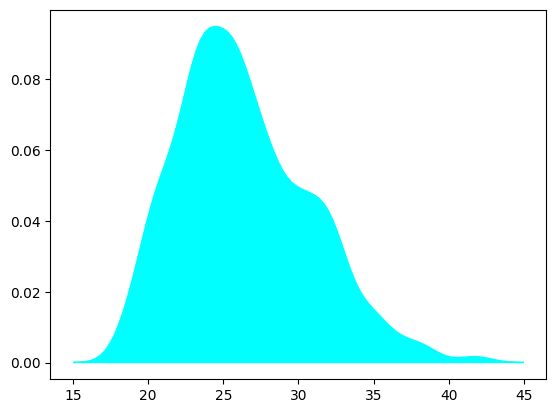

In [55]:
# https://stackabuse.com/kernel-density-estimation-in-python-using-scikit-learn/
# Si necesito más info mirar https://scikit-learn.org/stable/modules/density.html#kernel-density

# Cambiando un poco metodología a como se explica en la guia de stackabuse:
x2 = np.array(df.BMI)[:, np.newaxis]
x_test = np.linspace(15, 45, 100)[:, np.newaxis] # To find the shape of estimated density, generate a set
# of test data points that span the range of the data and then evaluate the estimated density at each point.

# We will create a KerneDensity object and use the fit() method to find the score of each sample shown below.
    # The KernelDensity() method uses two parameters: bandwidth and kernel. The bandwidth parameter controls the
    # variance of the kernel. The kernel parameter specifies the kernel type to be used. The most common kernel 
    # types are 'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'.
model = KernelDensity(bandwidth=1.0, kernel='gaussian')
# fit the KDE model to the data, BMI feature (x2) in this example
model.fit(x2)
# score_samples returns the log of the probability density
log_dens = model.score_samples(x_test)

# The shape of the distribution can be viewed by plotting the density score for each point:
plt.fill(x_test, np.exp(log_dens), c='cyan')
plt.show()


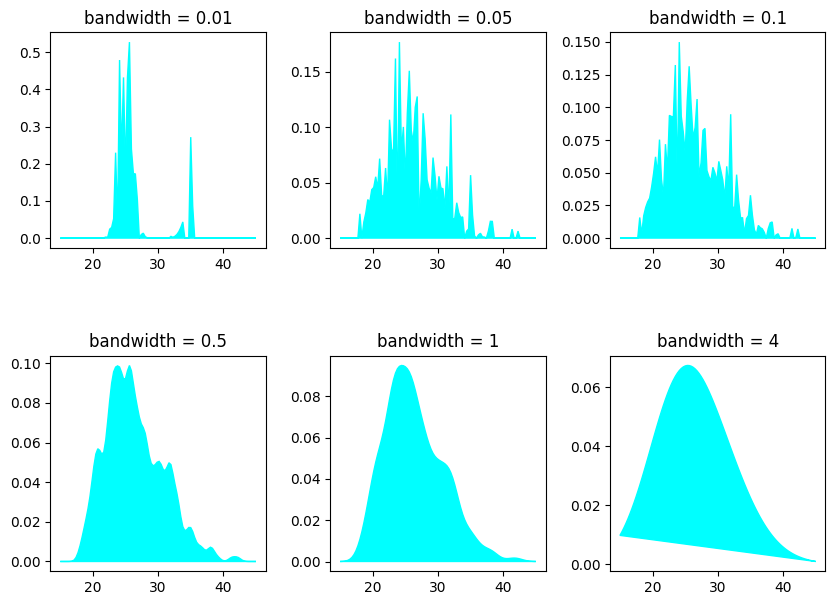

In [56]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(bandwidth=b, kernel='gaussian')
    kde_model.fit(x2)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score), c='cyan')
    plt.title('bandwidth = ' + str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

<font color='orange'>[!NOTE]</font> Aumentando el bandwidth obtenemos una grafica más suave (smooth). Las curvas de los bandwith muy pequeños son muy picudas, mientras que valores muy altos dan una curva muy generalizada, que pierde los detalles importantes.

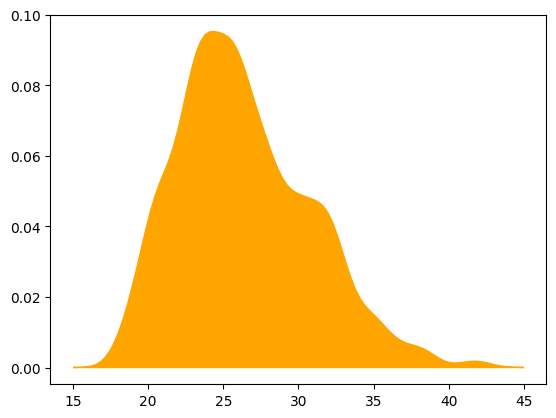

In [37]:
# Cambiando un poco metodología a como se explica en la guia de stackabuse:
x2 = np.array(df.BMI)[:, np.newaxis]
x_test = np.linspace(15, 45, 100)[:, np.newaxis] # To find the shape of estimated density, generate a set
# of test data points that span the range of the data and then evaluate the estimated density at each point.

# We will create a KerneDensity object and use the fit() method to find the score of each sample shown below.
    # The KernelDensity() method uses two parameters: bandwidth and kernel. The bandwidth parameter controls the
    # variance of the kernel. The kernel parameter specifies the kernel type to be used. The most common kernel 
    # types are 'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'.
model = KernelDensity(bandwidth=0.9, kernel='gaussian')
# fit the KDE model to the data, BMI feature (x2) in this example
model.fit(x2)
# score_samples returns the log of the probability density
log_dens = model.score_samples(x_test)

# The shape of the distribution can be viewed by plotting the density score for each point:
plt.fill(x_test, np.exp(log_dens), c='orange')
plt.show()

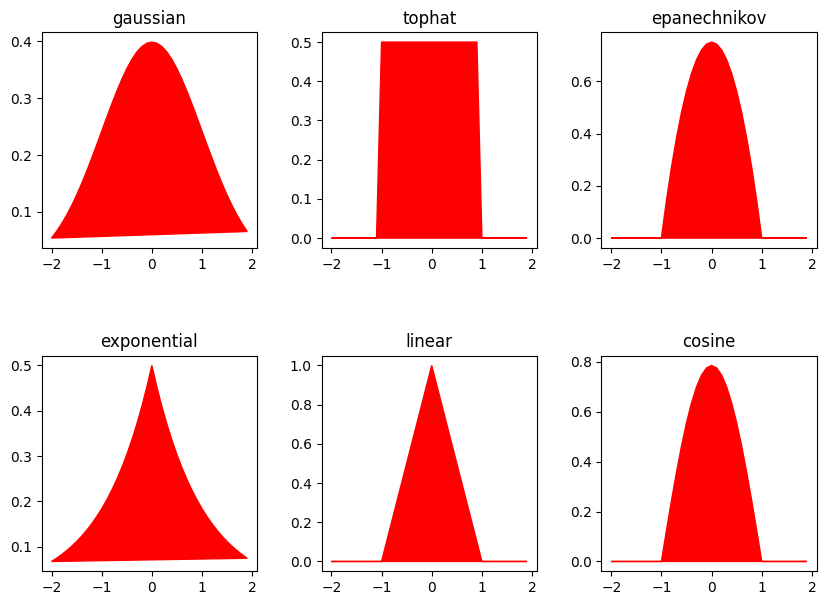

In [31]:
# The different kernels
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for k, ind in zip(kernels, plt_ind):
    kde_model = KernelDensity(kernel=k)
    kde_model.fit([[0]])
    score = kde_model.score_samples(np.arange(-2, 2, 0.1)[:, None])
    plt.subplot(ind)
    plt.fill(np.arange(-2, 2, 0.1), np.exp(score), c='red')
    plt.title(k)

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

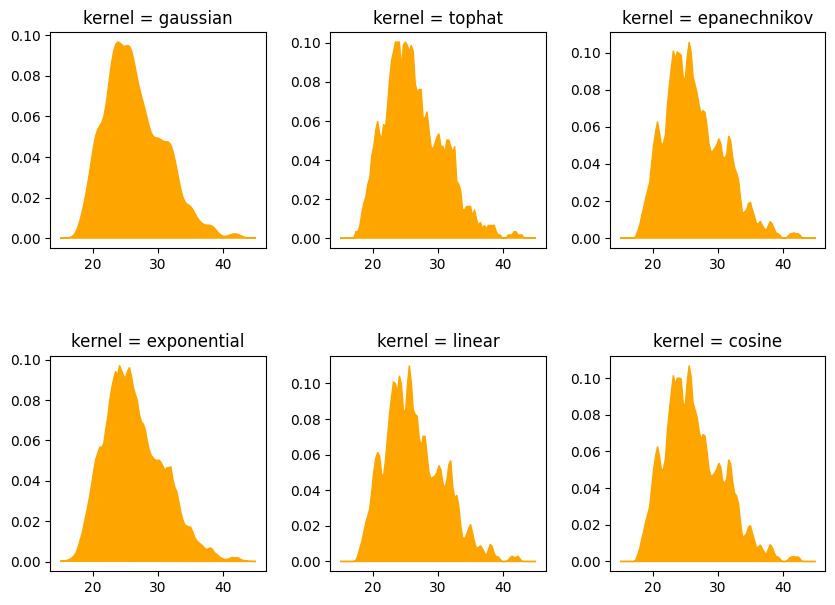

In [36]:
## DIFFERENT KERNELS in our model
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for k, ind in zip(kernels, plt_ind):
    kde_model = KernelDensity(bandwidth=0.7, kernel=k)
    kde_model.fit(x2)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score), c='orange')
    plt.title('kernel = ' + k)

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

<br>
<font color='red'>ADD YOUR ANALYSIS</font> 
<br>
It's important to choose the right bandwith parameter and right kernel in order to plot the most optimal possible graph to represent our data.

In this case, I would stick to a 0.7 bandwith and the ??? kernel.

<font color='orange'>help: HOW TO CHOOSE THE KERNEL???</font> 